In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [2]:
def osc(y_v, t, omega2=1):
    dy = y_v[1]
    dv = -omega2*y_v[0]
    return array([dy, dv])

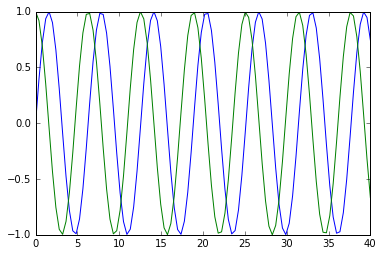

In [3]:
t = linspace(0,40, 100)
ini = array([0,1])

sol = odeint(osc, ini, t)
plot(t, sol[:,0])
plot(t, sol[:,1])

In [4]:
def root_trayect(func, pto_i, ti, error=1e-5):
    while abs(pto_i[0])>error:
        ti1 = ti - pto_i[0]/pto_i[1]
        sol = odeint(func, pto_i, [ti,ti1])
        ti = ti1
        pto_i = sol[-1]
    return ti, pto_i

In [5]:
ind = 10

ti = t[ind]
pto_i = sol[ind]
root_trayect(osc, pto_i, ti, error=1e-5)

(3.1415913642546212, array([  1.39153185e-06,  -9.99999892e-01]))

In [6]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,2))
j=0
for i in range(len(t)-1):
    if sol[i][0]*sol[i+1][0]<0:
        raices[j], puntos[j] = root_trayect(osc, sol[i], t[i], error=1e-5)
        j += 1
raices = raices[0:j]
puntos = puntos[0:j]

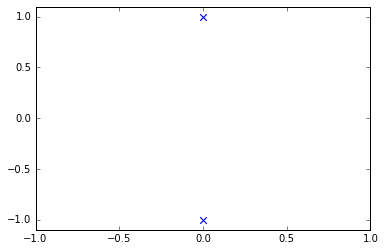

In [7]:
xlim(-1,1)
ylim(-1.1,1.1)
plot(puntos[:,0], puntos[:,1], 'x')

In [8]:
def osc_fric(y_v, t, omega2=1, gamma=0.1):
    dy = y_v[1]
    dv = -omega2*y_v[0] - gamma*y_v[1]
    return array([dy, dv])

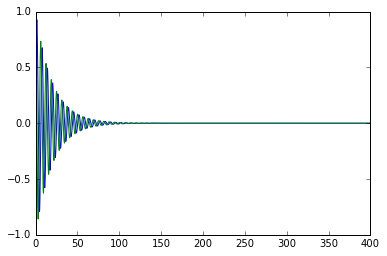

In [9]:
t = linspace(0, 400, 10000)
ini = array([0,1])

sol = odeint(osc_fric, ini, t)
plot(t, sol[:,0])
plot(t, sol[:,1])

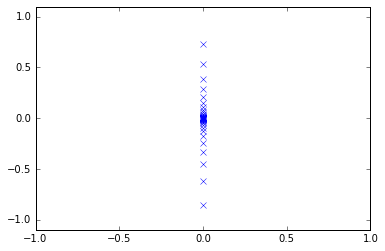

In [10]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,2))
j=0
for i in range(len(t)-1):
    if sol[i][0]*sol[i+1][0]<0:
        raices[j], puntos[j] = root_trayect(osc_fric, sol[i], t[i], error=1e-5)
        j += 1
raices = raices[0:j]
puntos = puntos[0:j]

xlim(-1,1)
ylim(-1.1,1.1)
plot(puntos[:,0], puntos[:,1], 'x')

# 2D

In [14]:
def ec_mov(x, t, epsilon=1.):
    r32 = sqrt(x[0]*x[0]+x[1]*x[1])**3
    ddx = -x[0]/r32
    ddy = -x[1]/r32
    return array([x[2],epsilon*x[3],ddx, ddy])

def energia(x, epsilon=1.):
    return 0.5*(x[2]*x[2]+epsilon*x[3]*x[3])-1./sqrt(x[0]*x[0]+x[1]*x[1])

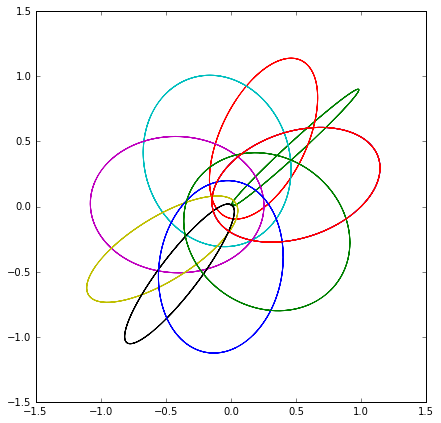

In [36]:
t = linspace(0, 10, 2000)
fig = figure(figsize=(7,7))
ax = fig.add_subplot(111)

for ang in linspace(0, 2*pi, 10):
    p_ini = array([cos(ang), sin(ang), 0.5, 0.5])
    sol = odeint(ec_mov, p_ini, t)
    ax.plot(sol[:,0],sol[:,1])

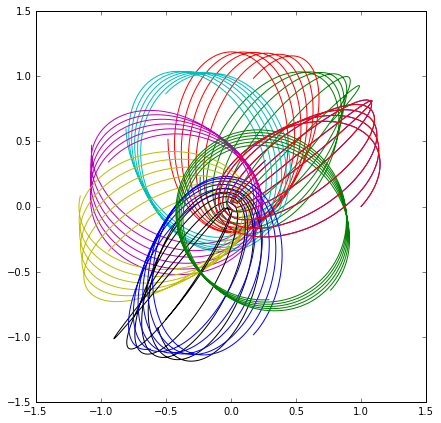

In [43]:
t = linspace(0, 20, 2000)
fig = figure(figsize=(7,7))
ax = fig.add_subplot(111)

for ang in linspace(0, 2*pi, 10):
    p_ini = array([cos(ang), sin(ang), 0.5, 0.5])
    sol = odeint(ec_mov, p_ini, t, args=(1.1,))
    ax.plot(sol[:,0],sol[:,1])